In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import mdtraj as md

In [7]:
#computes phi and psi dihedral angles

os.chdir('/home/rmo302/compclass/comp-lab-class/Week5/T300')

traj = md.load("adp_exchange4temps.trr", top = "adp_exchange4temps.gro")

phi = md.compute_phi(traj, periodic = True, opt = True)
psi = md.compute_psi(traj, periodic = True, opt = True)

/state/partition1/job-26186060/ipykernel_2592675/1610971227.py:3: RuntimeWarning: divide by zero encountered in log
  energy = -np.log(hist[0].T)


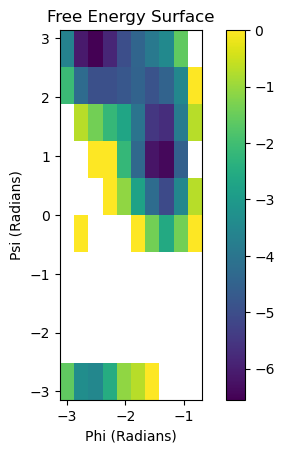

In [8]:
hist = np.histogram2d(phi[1][:,0], psi[1][:,0])

energy = -np.log(hist[0].T)

plt.imshow(energy, extent = [hist[1][0], hist[1][-1], hist[2][0], hist[2][-1]], 
           origin = 'lower')
plt.colorbar()
plt.title("Free Energy Surface")
plt.xlabel('Phi (Radians)')
plt.ylabel('Psi (Radians)')

plt.savefig('/home/rmo302/compclass/comp-lab-class/Week5/Figures/Replica Free Enrgy Surface.pdf')

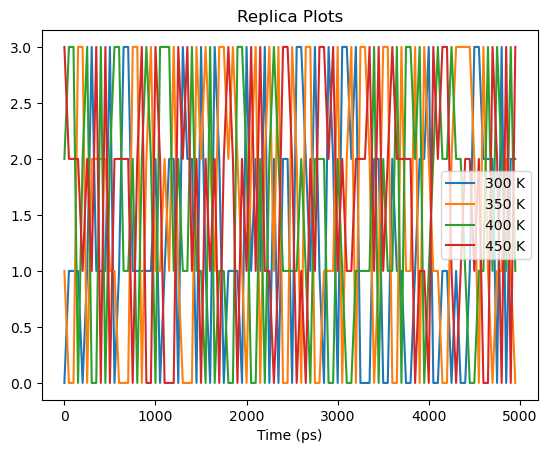

<Figure size 640x480 with 0 Axes>

In [9]:
#plotting replica 

x,y1, y2, y3, y4 = np.loadtxt("replica_temp.xvg", unpack = True)

plt.plot(x[::500], y1[::500], label = '300 K')
plt.plot(x[::500], y2[::500], label = '350 K')
plt.plot(x[::500], y3[::500], label = '400 K')
plt.plot(x[::500], y4[::500], label = '450 K')

plt.title('Replica Plots')
plt.xlabel('Time (ps)')
plt.legend()
plt.show()

plt.savefig('/home/rmo302/compclass/comp-lab-class/Week5/Figures/Replica Plots.pdf')

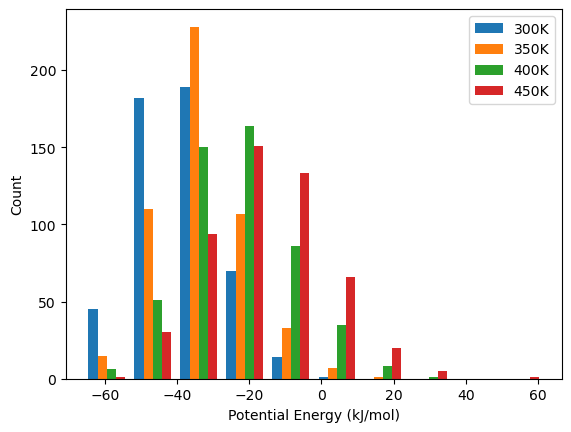

<Figure size 640x480 with 0 Axes>

In [10]:
# Potential energy histogram

os.chdir('/home/rmo302/compclass/comp-lab-class/Week5/T300')

x1,y1 = np.loadtxt('potential_300.xvg', comments = '#', unpack = True)

os.chdir('/home/rmo302/compclass/comp-lab-class/Week5/T350')

x2,y2 = np.loadtxt('potential_350.xvg', comments = '#', unpack = True)

os.chdir('/home/rmo302/compclass/comp-lab-class/Week5/T400')

x3,y3 = np.loadtxt('potential_400.xvg', comments = '#', unpack = True)

os.chdir('/home/rmo302/compclass/comp-lab-class/Week5/T450')

x4,y4= np.loadtxt('potential_450.xvg', comments = '#', unpack = True)


fig, ax1 = plt.subplots()
ax1.hist([y1, y2, y3, y4], label = ['300K', '350K', '400K', '450K'])

plt.xlabel('Potential Energy (kJ/mol)')
plt.ylabel('Count')
plt.legend()
plt.show()
plt.savefig('/home/rmo302/compclass/comp-lab-class/Week5/Figures/Potential Energy Histogram.pdf')